# 09. CC-U 门分解 & Toffoli 门

接下来的讨论是为之后证明CNOT与单比特门的集合的通用性做铺垫，我们需要一些分解线路的方法作为工具。

对于多控制门，我们考虑以下情况：
$$
U=V^2
$$
存在以下等价线路：

![CC-U gate decomposition](images/CC_U_decomposition.png)

这是一种用受控V门简化CC-U门的标准分解方法。

为了理解它（不是证明它），让我们忘记第一个和最后一个控制操作。 在这种情况下，中间部分给出了以下变换：

$$
\begin{aligned}
|00\rangle & \rightarrow I  \qquad \qquad |00\rangle\langle 00| \otimes I \rightarrow |00\rangle\langle 00| \otimes I \\
|11\rangle & \rightarrow I  \qquad \qquad |11\rangle\langle 11| \otimes I \rightarrow |11\rangle\langle 11| \otimes V^2 \\
|01\rangle & \rightarrow V^\dagger \qquad \quad |01\rangle\langle 01| \otimes V^\dagger \rightarrow |01\rangle\langle 01| \otimes V^\dagger V \\
|10\rangle & \rightarrow V^\dagger \qquad \quad |10\rangle\langle 10| \otimes V^\dagger \rightarrow |10\rangle\langle 10| \otimes V V^\dagger
\end{aligned}
$$

CC-U门的效果实际上是这样：
$$
C_{U}=|00\rangle\langle 00|\otimes I+| 01\rangle\langle 01|\otimes I+| 10\rangle\langle 10|\otimes I+| 11\rangle\langle 11| \otimes U
$$
如果我们现在应用回第一个和最后一个受控操作，那么我们会得到正确的答案。

<br>

我们也可以选择一个实例，用 MindQuantum 验证以上线路的等价性，现在我们令$U = Y$。

首先构建 CC-Y 门，可以通过`list`将多个控制位输入`Y`门的第二个参数得到多控制Y门。

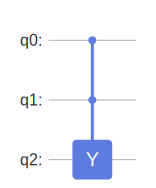

In [1]:
from mindquantum.core.gates import Y
from mindquantum.core.circuit import Circuit

circ = Circuit()
circ += Y.on(2, [0, 1])
circ.svg()

接下来需要得到$V$使得$V^2 = Y$，这可以通过接口`Power()`实现。然后构建出相应线路。

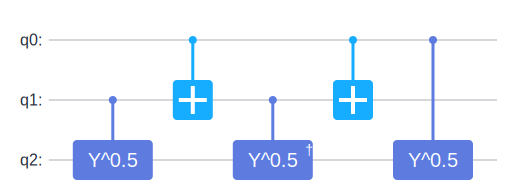

In [2]:
from mindquantum.core.gates import Power, X

V = Power(Y, 0.5)
circ2 = Circuit()
circ2 += V.on(2, 1)
circ2 += X.on(1, 0)
circ2 += V.hermitian().on(2, 1)
circ2 += X.on(1, 0)
circ2 += V.on(2, 0)

circ2.svg()

将两个线路的矩阵进行比对，判断是否等价。

In [3]:
import numpy as np

is_equiv = np.allclose(circ.matrix(), circ2.matrix())
print(is_equiv)

True


可以看到，两个线路的对应矩阵完全相同。

# Toffoli 门

当$U = X$时，得到的CC-X门被称为Toffoli门。在这种情况下，$V=(1-i)(I+iX)/2$。可以快速证明$V$是幺正的：
$$
V^\dagger = (1+i)(I-iX)/2
$$
然后
$$
V^{\dagger} V=\frac{1}{4}(1-i)(1+i)(I-i X)(I+i X)=\frac{1}{2}(I+I)=I
$$
现在我们知道如何用CNOT+单比特门集合来模拟Toffoli门。接下来是Toffoli门的第一个应用，分解多控制$U$门：
$$
C_{n}(U)\left|x_{1} x_{2} x_{3} x_{4} x_{5}\right\rangle|\psi\rangle=\left|x_{1} x_{2} x_{3} x_{4} x_{5}\right\rangle U^{x_{1} x_{2} x_{3} x_{4} x_{5}}|\psi\rangle
$$
下图中的$|c_1\rangle,|c_2\rangle\cdots |c_5\rangle$就等同于$\left|x_{1} x_{2} x_{3} x_{4} x_{5}\right\rangle$：

![multiple-control U gate decomposition](images/multiple_CU_decomposition.png)

以上线路可以直接看出其效果：如果$c_1$和$c_2$都是$|1\rangle$，则第一个辅助比特翻转为$|1\rangle$；如果$c_3$和第一个辅助比特都是$|1\rangle$则第二个辅助比特翻转为$|1\rangle$（这意味着$c_1,c_2,c_3$都是$|1\rangle$），依此类推。因此最后只有所有控制位都为$|1\rangle$时才作用$U$门，即实现了多控制$U$门。

## 示例

考虑初态$\alpha|00000\rangle|\psi\rangle+\beta|11111\rangle|\psi\rangle$，插入中间的辅助量子比特后表示为$\alpha|00000\rangle|0000\rangle|\psi\rangle+\beta|11111\rangle|0000\rangle|\psi\rangle$。现在作用上述量子线路（到CU处截止），得到的量子态如下：
$$
\alpha|00000\rangle|0000\rangle|\psi\rangle+\beta|11111\rangle|1111\rangle U|\psi\rangle
$$
此时辅助比特与系统比特纠缠在一起，这不是我们想要的。因此我们需要在最后将它们全部重置为$|0\rangle$态，这正是后半部分的那些顺序相反的Toffoli门的作用。

In [4]:
from show_info import InfoTable

InfoTable('mindquantum', 'numpy')

# 习题

## Exercise 1

设上图中的多控制U门为$U = R_x(\frac{\pi}{5})$，请用MindQuantum验证多控制$R_x$门可以分解为多个Toffoli门和控制$R_x$门（验证线路矩阵等价）。